In [1]:
%matplotlib inline
import sys
from astropy.table import Table, vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import hstack
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
from scipy import optimize
from scipy.stats import gaussian_kde

In [3]:
## automatically reload any modules read below that might have changed (e.g. plots)
%reload_ext autoreload
%autoreload 2
# importing plotting and locus tools: 
sys.path.append('../src')
import LocusTools as lt
import PlotTools as pt

In [4]:
## read catalog produced at Astro Lab
infile = '../data/AstroLabPriors/Stripe82/SDSSpatchRA340-350-TRILEGALcatalog.txt'
cat = lt.readAstroLabCatalog(infile)

FileNotFoundError: [Errno 2] No such file or directory: '../data/AstroLabPriors/Stripe82/SDSSpatchRA340-350-TRILEGALcatalog.txt'

In [ ]:
# save original TRILEGAL magnitudes
for b in ['u', 'g', 'r', 'i', 'z']:  
    cat[b+'magTL'] = cat[b+'mag']
## and this is a hack to "fix" TRILEGAL [Fe/H] distribution to be more similar to SDSS measurements
if (1):
    # shift thin disk stars to lower [Fe/H] by 0.3 dex
    cat['FeH'] = np.where(cat['GC']==1, cat['FeH']-0.3, cat['FeH'])
    # shift halo stars to higher [Fe/H] by 0.1 dex
    cat['FeH'] = np.where(cat['GC']==3, cat['FeH']+0.1, cat['FeH'])

In [ ]:
## separate MS/RGs from white dwarfs 
catMSRG = cat[cat['pop']<9]
catWD = cat[cat['pop']==9]
print('MSRG:', np.size(catMSRG), 'WD:', np.size(catWD))

In [6]:
## show Galactic component the star belongs to: 
##   1 → thin disk; 2 → thick disk; 3 → halo; 4 → bulge; 5 → Magellanic Clouds.
kk = catMSRG['GC']
t = {}
total = 0
for i in range(1,6):
    t[i] = catMSRG[kk==i]
    print(i, np.size(t[i]))
    total += np.size(t[i])
print('total:', total)

1 125199
2 105500
3 689547
4 0
5 0
total: 920246


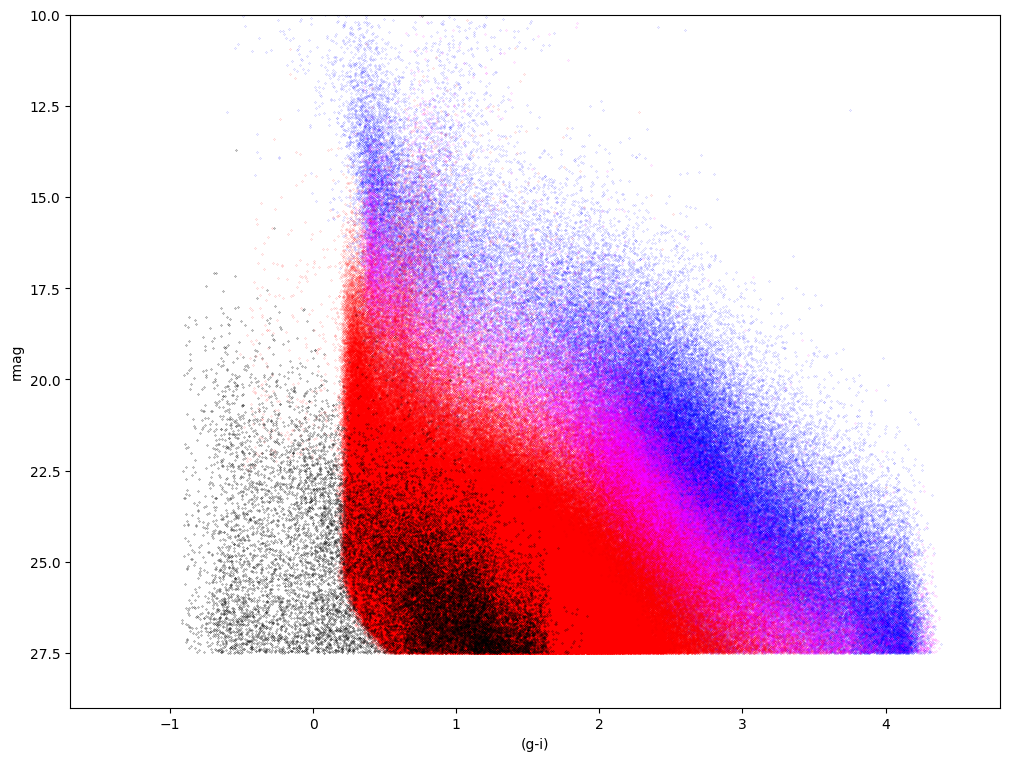

In [7]:
# Galactic components: 
fig,ax = plt.subplots(1,1,figsize=(12,9))
C1 = 'gi'
C2 = 'rmag'

ax.set_xlim(-1.7,4.8)
ax.set_ylim(29,10) 

ax.set_xlabel('(g-i)')
ax.set_ylabel('rmag')

ax.scatter(t[1][C1], t[1][C2], s=0.01, c='blue')
ax.scatter(t[2][C1], t[2][C2], s=0.01, c='magenta')
ax.scatter(t[3][C1], t[3][C2], s=0.01, c='red')
ax.scatter(t[4][C1], t[4][C2], s=0.05, c='cyan')

ax.scatter(catWD[C1], catWD[C2], s=0.05, c='black')

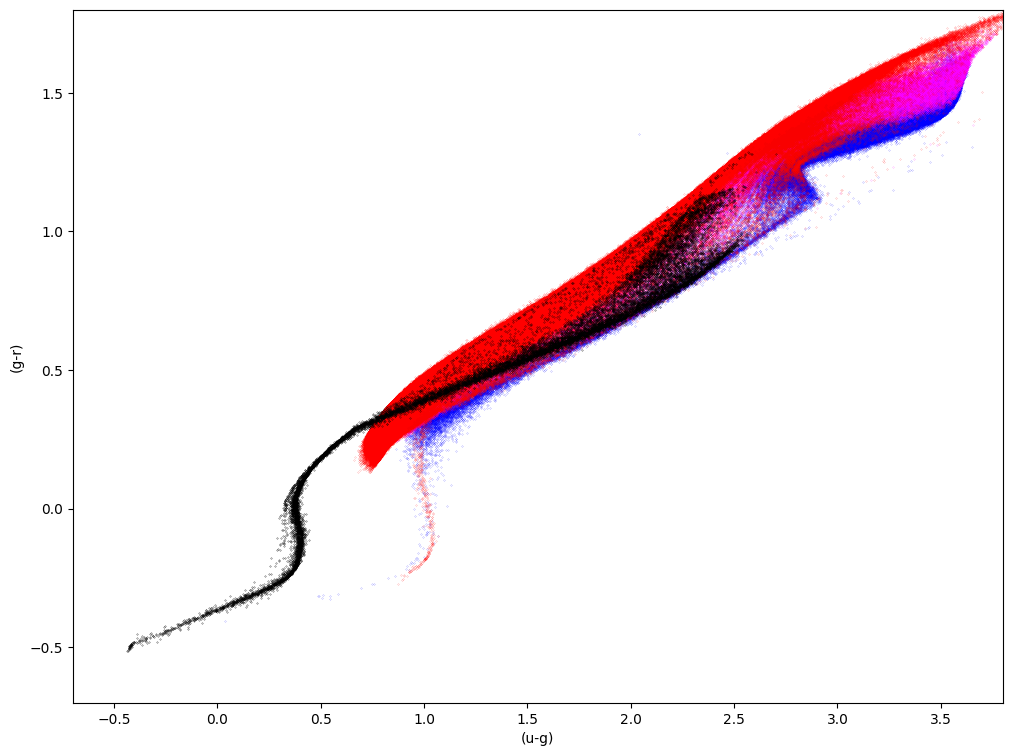

In [8]:
fig,ax = plt.subplots(1,1,figsize=(12,9))
C1 = 'ug'
C2 = 'gr'

ax.set_xlim(-0.7,3.8)
ax.set_ylim(-0.7,1.8) 

ax.set_xlabel('(u-g)')
ax.set_ylabel('(g-r)')

ax.scatter(t[1][C1], t[1][C2], s=0.01, c='blue')
ax.scatter(t[2][C1], t[2][C2], s=0.01, c='magenta')
ax.scatter(t[3][C1], t[3][C2], s=0.01, c='red')
ax.scatter(t[4][C1], t[4][C2], s=0.05, c='cyan')

ax.scatter(catWD[C1], catWD[C2], s=0.05, c='black')

(7.0, -2.0)

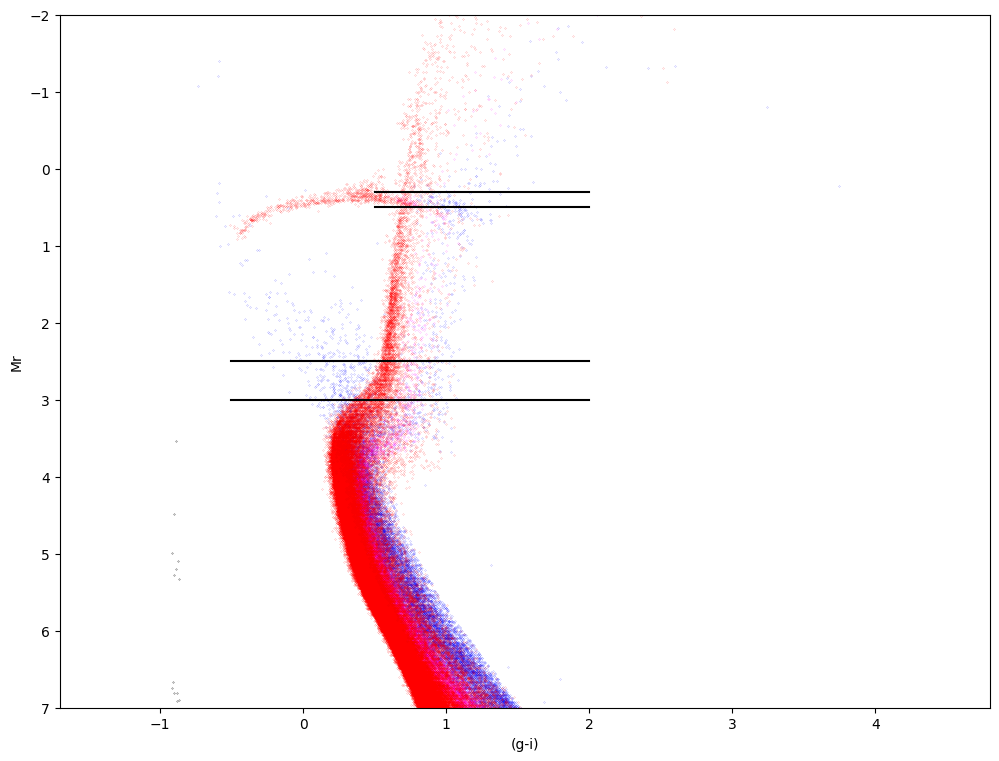

In [9]:
# Galactic components: 
fig,ax = plt.subplots(1,1,figsize=(12,9))
C1 = 'gi'
C2 = 'Mr'

ax.set_xlabel('(g-i)')
ax.set_ylabel('Mr')

ax.scatter(t[1][C1], t[1][C2], s=0.01, c='blue')
ax.scatter(t[2][C1], t[2][C2], s=0.01, c='magenta')
ax.scatter(t[3][C1], t[3][C2], s=0.01, c='red')
ax.scatter(t[4][C1], t[4][C2], s=0.05, c='cyan')

ax.scatter(catWD[C1], catWD[C2], s=0.05, c='black')

ax.plot([0.5, 2.0], [0.3,0.3], c='black')
ax.plot([0.5, 2.0], [0.5,0.5], c='black')

ax.plot([-0.5, 2.0], [3.0, 3.0], c='black')
ax.plot([-0.5, 2.0], [2.5,2.5], c='black')

ax.set_xlim(-1.7,4.8)
ax.set_ylim(7,-2) 


## a few more sanity plots and a comparison to SDSS locus parametrization (MS & RG)

In [10]:
# augmented SDSS locus for DSED 10 Gyr isochrone
datafile = '../data/LocusData/SDSSDSEDlocus_10Gyr.txt'
L10 = lt.readSDSSDSEDlocus(datafile, fixForStripe82=False)
# white dwarfs
infile = '../data/LocusData/WD_Hydrogen_MrColorSequences.txt'
HWD = lt.readWDlocus(infile)
infile = '../data/LocusData/WD_Helium_MrColorSequences.txt'
HeWD = lt.readWDlocus(infile)

reading from: ../data/LocusData/WD_Hydrogen_MrColorSequences.txt
reading from: ../data/LocusData/WD_Helium_MrColorSequences.txt


(7.0, -4.0)

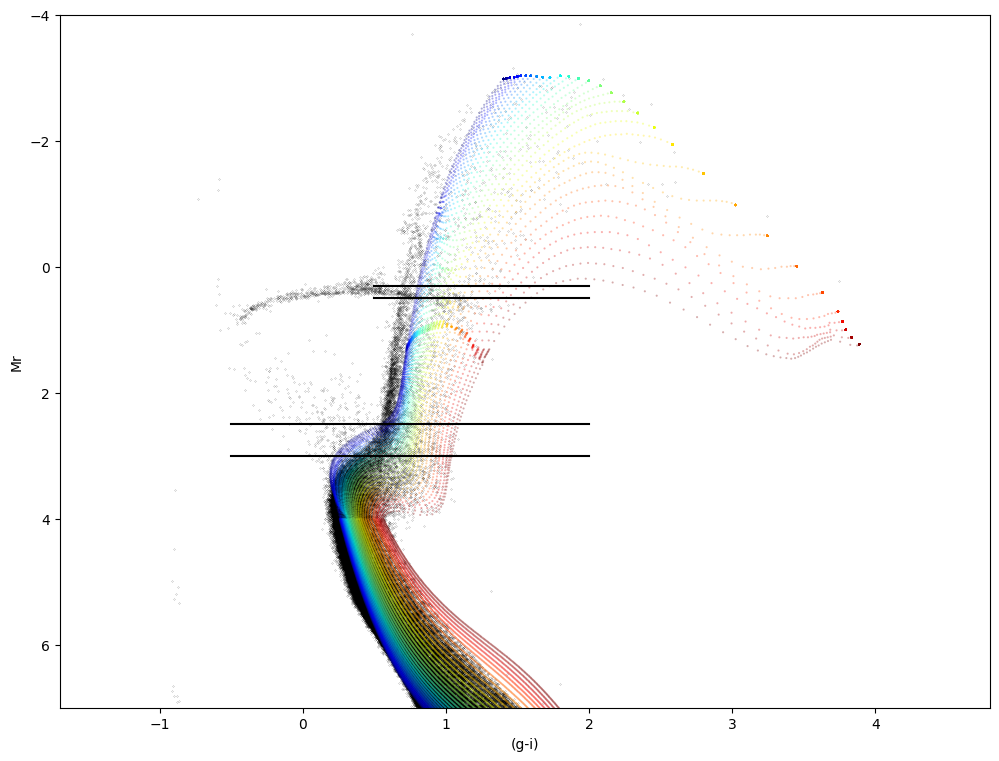

In [11]:
# compare selected stars to the full sample
fig,ax = plt.subplots(1,1,figsize=(12,9))

ax.set_xlim(-1.7,4.8)
ax.set_ylim(18,-4) 
ax.set_xlabel('(g-i)')
ax.set_ylabel('Mr')

ax.scatter(cat['gi'], cat['Mr'], s=0.01, c='black')  
 
ax.scatter(L10['gi'], L10['Mr'], s=0.3, c=L10['FeH'], cmap=plt.cm.jet, alpha=0.3)

ax.plot(HWD['gi'], HWD['Mr'], 'r')
ax.plot(HeWD['gi'], HeWD['Mr'], 'b')


ax.plot([0.5, 2.0], [0.3,0.3], c='black')
ax.plot([0.5, 2.0], [0.5,0.5], c='black')

ax.plot([-0.5, 2.0], [3.0, 3.0], c='black')
ax.plot([-0.5, 2.0], [2.5,2.5], c='black')

ax.set_xlim(-1.7,4.8)
ax.set_ylim(7,-4) 


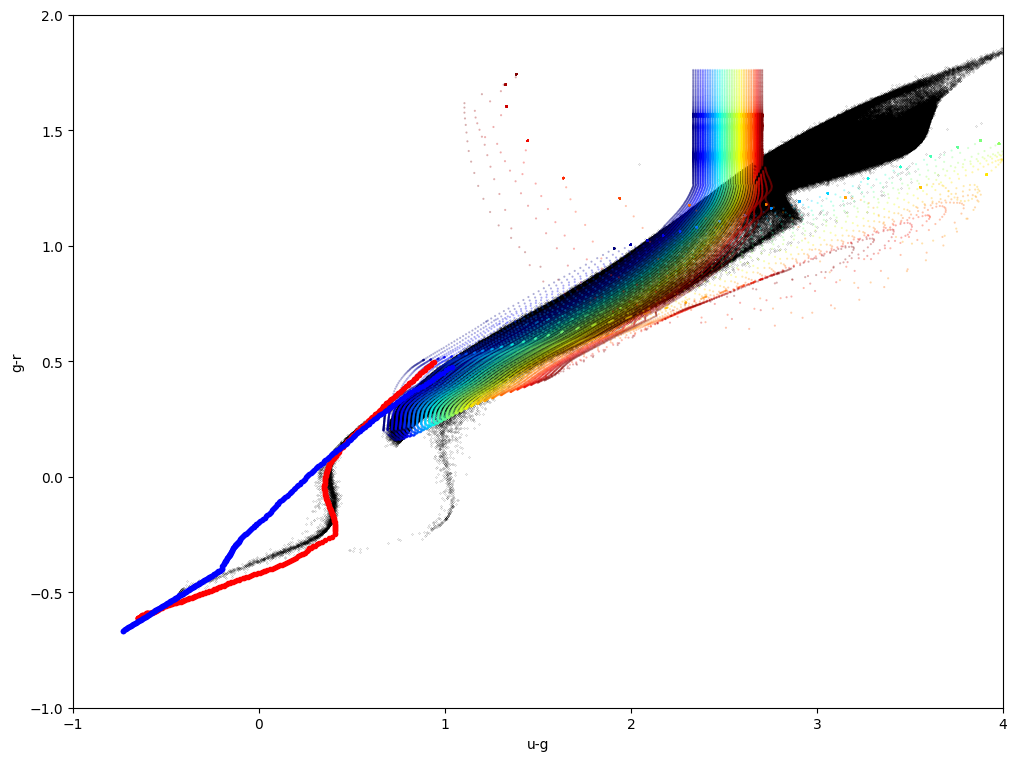

In [12]:
# compare selected stars to the full sample
fig,ax = plt.subplots(1,1,figsize=(12,9))

ax.set_xlim(-1.0,4.0)
ax.set_ylim(-1,2.0) 
ax.set_xlabel('u-g')
ax.set_ylabel('g-r')

ax.scatter(cat['ug'], cat['gr'], s=0.01, c='black')  
 
ax.scatter(L10['ug'], L10['gr'], s=0.3, c=L10['FeH'], cmap=plt.cm.jet, alpha=0.3)

ax.plot(HWD['ug'], HWD['gr'], '.-r')
ax.plot(HeWD['ug'], HeWD['gr'], '.-b')

## Generate simulated "observed" photometry with uncertainties:
### - original magnitudes  from TRILEGAL have suffix "TL" (umagTL, ugTL...)
### - re-generated mags and colors using SDSS stellar locus, and without noise, have suffix "SL" 
### - "observed" versions will have suffix Obs (including re-generated errors, see 6 below)

In [13]:
### all good so far, now: 
## 1) given rmag, Ar and DM, generate Mr 
## 2) with FeH and Mr, generate colors 
## 3) with original r magnitude, generate other magnitudes from colors
## 4) given magnitudes, generate errors for LSST
## 5) generate observed mags
## 6) regenerate "observed" errors from "observed" magnitudes
## 7) store in a data file 

In [14]:
## 1) already done above

In [15]:
print(np.min(catMSRG['Mr']), np.max(catMSRG['Mr']))
print(np.min(catMSRG['FeH']), np.max(catMSRG['FeH']))

-3.85 17.39
-2.09 0.47


In [16]:
## 2) actual call to get colors (5ms with fast version)
# limit FeH and Mr to values supported by LSSTlocus (DSED version)
FeHmin = -2.50
FeHmax = 0.50
MrRGcut = -2.0  # limit from TRILEGAL priors 
MrMax = 16.0    # limit from SDSS locus 
# apply FeH and Mr cuts above: 
tGoodMSRG = catMSRG[(catMSRG['FeH']>=FeHmin)&(catMSRG['FeH']<=FeHmax)&(catMSRG['Mr']>MrRGcut)&(catMSRG['Mr']<MrMax)]
print(np.size(tGoodMSRG), np.size(tGoodMSRG)/np.size(catMSRG)) 

909672 0.9885095941737319


In [17]:
print(np.min(tGoodMSRG['Mr']), np.max(tGoodMSRG['Mr']))
print(np.min(tGoodMSRG['FeH']), np.max(tGoodMSRG['FeH']))

-1.99 15.99
-2.09 0.47


In [18]:
## assign colors to MSRG subsample
timeStart = !date +%s  
## actual call to get (dust-free) colors for each star in tGoodOK (5ms with fast version)
lt.getColorsFromMrFeHDSED(L10, tGoodMSRG)
timeEnd = !date +%s  
runTime = int(timeEnd[0])-int(timeStart[0])
print('Finished in', runTime, 'seconds.')

Finished in 276 seconds.


In [19]:
MrChange = tGoodMSRG['Mr'] - tGoodMSRG['MrAssigned'] 
print(np.min(MrChange), np.median(MrChange), np.max(MrChange))

-0.04000000000000001 0.0 0.040000000000000036


In [20]:
## assign colors to WD subsample
fHe = 0.2    ## 0.1 in LSST Science Book, section 6.11.6 but we need to emphasize He more
lt.getWDcolorsFromMr(HWD, HeWD, fHe, catWD)

In [21]:
## merge MSRG and WD catalogs 
tGoodOK =  vstack([tGoodMSRG, catWD])  

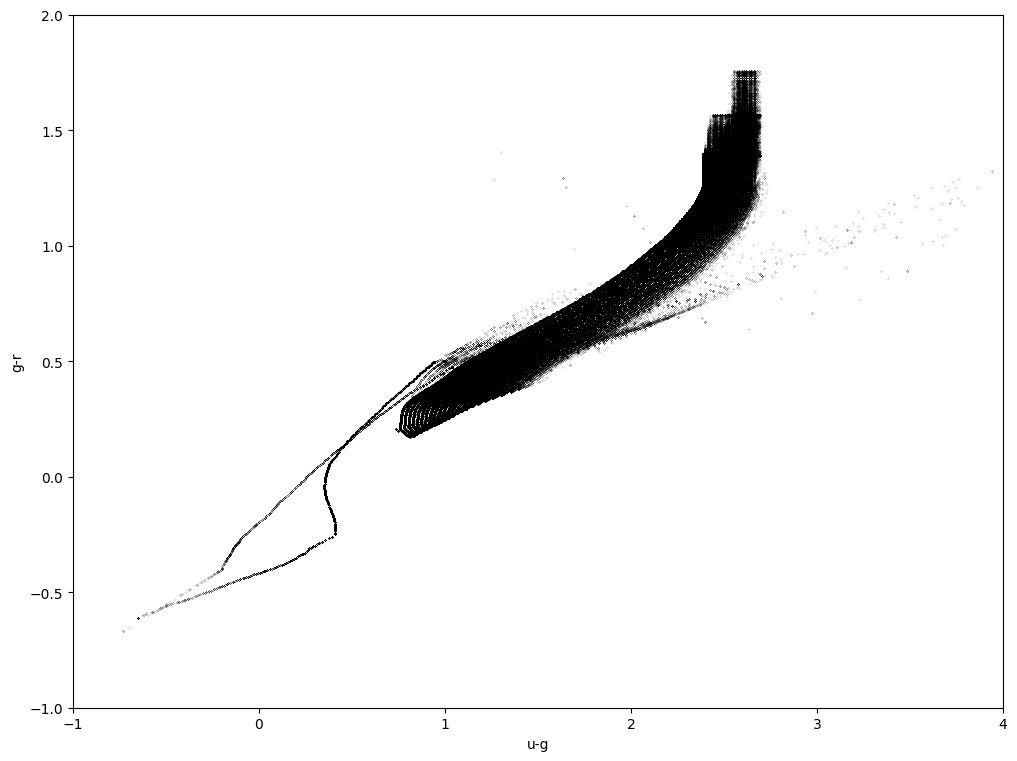

In [22]:
# compare selected stars to the full sample
fig,ax = plt.subplots(1,1,figsize=(12,9))

ax.set_xlim(-1.0,4.0)
ax.set_ylim(-1,2.0) 
ax.set_xlabel('u-g')
ax.set_ylabel('g-r')

ax.scatter(tGoodOK['ug'], tGoodOK['gr'], s=0.01, c='black')  

In [23]:
# let's rename them (and suffix 0 since they don't have dust reddening) 
tGoodOK['ugSL0'] = tGoodOK['ug']
tGoodOK['grSL0'] = tGoodOK['gr']
tGoodOK['riSL0'] = tGoodOK['ri']
tGoodOK['izSL0'] = tGoodOK['iz'] 
tGoodOK['giSL0'] = tGoodOK['grSL0'] + tGoodOK['riSL0']

In [24]:
## tGoodOK['ug0'] etc. are dust-free colors, now add reddening using Ar along the sightline from TRILEGAL 
## and standard extinction coefficients (from Berry+2012)
# first setup of dust extinction in each band
C = lt.extcoeff()
for b in ['u', 'g', 'i', 'z']:  
    tGoodOK['A'+b] = C[b]*tGoodOK['Ar']  
# and now redden input colors (from stellar locus)
tGoodOK['ugSL'] = tGoodOK['ugSL0'] + tGoodOK['Au'] - tGoodOK['Ag'] 
tGoodOK['grSL'] = tGoodOK['grSL0'] + tGoodOK['Ag'] - tGoodOK['Ar'] 
tGoodOK['riSL'] = tGoodOK['riSL0'] + tGoodOK['Ar'] - tGoodOK['Ai'] 
tGoodOK['izSL'] = tGoodOK['izSL0'] + tGoodOK['Ai'] - tGoodOK['Az'] 

In [27]:
# LSST-motivated faint limit for the output catalog (removes faint stars, ~28%)
rmagMax = 26.0 
giMin = -1.0
giMax = 5.0
tGood4sims = tGoodOK[(tGoodOK['giSL0']>giMin)&(tGoodOK['giSL0']<giMax)&(tGoodOK['ugSL0']>-1)&(tGoodOK['rmagTL']<rmagMax)]
print(np.size(tGood4sims), np.size(tGood4sims)/np.size(tGoodOK))

619576 0.6673114578239806


In [28]:
## 3) simulated (noise-free) magnitudes, anchored to TRILEGAL's original r band magnitude: tGood4sims['rmag']
#      note that colors 0 (e.g. tGood4sims['gr']) are DUST-FREE COLORS generated in lt.getColorsFromMrFeH,
#      while colors/magnitudes without "0" include dust reddening
#      tGood4sims['rmag'] comes directly from TRILEGAL (and it includes dust extinction) 
# other magnitudes with ISM extinction accounted for
tGood4sims['rmagSL'] = tGood4sims['rmagTL']
tGood4sims['gmagSL'] = tGood4sims['rmagSL'] + tGood4sims['grSL']
tGood4sims['umagSL'] = tGood4sims['gmagSL'] + tGood4sims['ugSL']
tGood4sims['imagSL'] = tGood4sims['rmagSL'] - tGood4sims['riSL']
tGood4sims['zmagSL'] = tGood4sims['imagSL'] - tGood4sims['izSL']

In [29]:
## 4) generate errors expected for LSST coadded depth (per Bianco+2022 paper)
#        note: errors are generated using true dust-extincted magnitudes generated in 3
errorsTrue = lt.getLSSTm5(tGood4sims, depth='coadd', magVersion=True, suffix='SL')

In [30]:
## 5) generate observed mags (by drawing random gaussian noise with mag-dependent std)
ObsMag = {}
for b in ['u', 'g', 'r', 'i', 'z']:  
    tGood4sims[b+'magErrSL'] = errorsTrue[b]
    noise = np.random.normal(0, tGood4sims[b+'magErrSL'])   
    ### this is a hack to prevent super faint stars ending up very bright ###
    minErr = np.where(np.abs(noise)>1, 1, noise)
    # adding noise to true noise-free dust-extincted magnitudes
    tGood4sims[b+'magObs'] = tGood4sims[b+'magSL'] + minErr
    ObsMag[b] = tGood4sims[b+'magObs'] 

In [31]:
# errors for "SL" colors
tGood4sims['ugErrSL'] = np.sqrt(tGood4sims['umagErrSL']**2 + tGood4sims['gmagErrSL']**2)
tGood4sims['grErrSL'] = np.sqrt(tGood4sims['gmagErrSL']**2 + tGood4sims['rmagErrSL']**2)
tGood4sims['riErrSL'] = np.sqrt(tGood4sims['rmagErrSL']**2 + tGood4sims['imagErrSL']**2)
tGood4sims['izErrSL'] = np.sqrt(tGood4sims['imagErrSL']**2 + tGood4sims['zmagErrSL']**2)

In [32]:
# now get errors derived from "observed" magnitudes
#   IMPORTANT: errors are NOT generated using original noise-free magnitudes
ObsMagErr = lt.getLSSTm5err(ObsMag)
for b in ['u', 'g', 'r', 'i', 'z']:  
    tGood4sims[b+'magErrObs'] = ObsMagErr[b]  

In [33]:
# test chi2 behavior for observed magnitudes
for b in ['u', 'g', 'r', 'i', 'z']:   
    chi = (tGood4sims[b+'magObs'] - tGood4sims[b+'magSL'])/tGood4sims[b+'magErrSL'] 
    chiB = chi[ObsMag[b] < 20]
    print('   band:', b, 'chi2dof=', np.std(chiB), np.std(chi))
    chi = (tGood4sims[b+'magObs'] - tGood4sims[b+'magSL'])/tGood4sims[b+'magErrObs']  
    chiB = chi[ObsMag[b] < 20]
    print('trueErr:', b, 'chi2dof=', np.std(chiB), np.std(chi))

   band: u chi2dof= 0.9982733939608999 0.7389055639437017
trueErr: u chi2dof= 0.9982691810534476 0.7927063032842744
   band: g chi2dof= 1.0086654748793498 1.0002131695607612
trueErr: g chi2dof= 1.0086670761863306 1.0326817269880422
   band: r chi2dof= 0.9982349529506308 0.9998378566636895
trueErr: r chi2dof= 0.9982369754766585 1.0023863691903583
   band: i chi2dof= 1.0031877927342117 1.0020646040535028
trueErr: i chi2dof= 1.0031892554908648 1.0043989703195446
   band: z chi2dof= 0.9982837749929174 0.9992428284485949
trueErr: z chi2dof= 0.9982880382602034 1.005212719776287


In [34]:
chi2 = 0*ObsMagErr['u']
for b in ['u', 'g', 'r', 'i', 'z']:   
    chi2 = chi2 + ((tGood4sims[b+'magObs'] - tGood4sims[b+'magSL'])/tGood4sims[b+'magErrSL'])**2 
chi2B = chi2[ObsMag['u']<20]
print('  mean, median:', np.mean(chi2)/5, np.median(chi2)/5)
print('B mean, median:', np.mean(chi2B)/5, np.median(chi2B)/5)

  mean, median: 0.9132521138249382 0.7847536657015327
B mean, median: 1.000701423353925 0.8727170613174872


In [35]:
# generate observed colors (with and without dust extinction)
tGood4sims['ugObs'] = tGood4sims['umagObs'] - tGood4sims['gmagObs'] 
tGood4sims['grObs'] = tGood4sims['gmagObs'] - tGood4sims['rmagObs'] 
tGood4sims['riObs'] = tGood4sims['rmagObs'] - tGood4sims['imagObs'] 
tGood4sims['izObs'] = tGood4sims['imagObs'] - tGood4sims['zmagObs'] 
tGood4sims['giObs'] = tGood4sims['grObs'] + tGood4sims['riObs'] 

# correct colors for ISM dust reddening
tGood4sims['ugObs0'] = tGood4sims['ugObs'] - (tGood4sims['Au']-tGood4sims['Ag'])
tGood4sims['grObs0'] = tGood4sims['grObs'] - (tGood4sims['Ag']-tGood4sims['Ar'])
tGood4sims['riObs0'] = tGood4sims['riObs'] - (tGood4sims['Ar']-tGood4sims['Ai'])
tGood4sims['izObs0'] = tGood4sims['izObs'] - (tGood4sims['Ai']-tGood4sims['Az'])
tGood4sims['giObs0'] = tGood4sims['giObs'] - (tGood4sims['Ag']-tGood4sims['Ai'])

# errors for observed colors 
tGood4sims['ugErrObs'] = np.sqrt(tGood4sims['umagErrObs']**2 + tGood4sims['gmagErrObs']**2) 
tGood4sims['grErrObs'] = np.sqrt(tGood4sims['gmagErrObs']**2 + tGood4sims['rmagErrObs']**2) 
tGood4sims['riErrObs'] = np.sqrt(tGood4sims['rmagErrObs']**2 + tGood4sims['imagErrObs']**2) 
tGood4sims['izErrObs'] = np.sqrt(tGood4sims['imagErrObs']**2 + tGood4sims['zmagErrObs']**2) 

In [36]:
## test chi2 for observed colors
colors = ('ug', 'gr', 'ri', 'iz')  
for c in colors:
    dm = (tGood4sims[c+'Obs']-tGood4sims[c+'SL']) 
    chiT = dm / tGood4sims[c+'ErrSL']  
    chiO = dm / tGood4sims[c+'ErrObs']   
    print(c, np.mean(dm), np.std(dm), np.mean(chiT), np.std(chiT), np.mean(chiO), np.std(chiO))

ug 0.3563442783868218 0.5694330004602948 0.1322574895565222 0.7400088600715612 -0.04587240308184983 0.7906354558620554
gr -0.00013108072405583615 0.12328475843273147 -0.0009713187328106588 1.0001454883139267 -0.0597382452637355 1.0221224432118456
ri -4.188755846178621e-05 0.04879660769336645 -0.0017533919368945526 1.001178843277304 -0.004968413129164027 1.0010178568133685
iz 5.534424192116613e-05 0.06092153293999032 0.0007340211709933959 1.0002707120819805 0.011872276677898502 1.0006049805007262


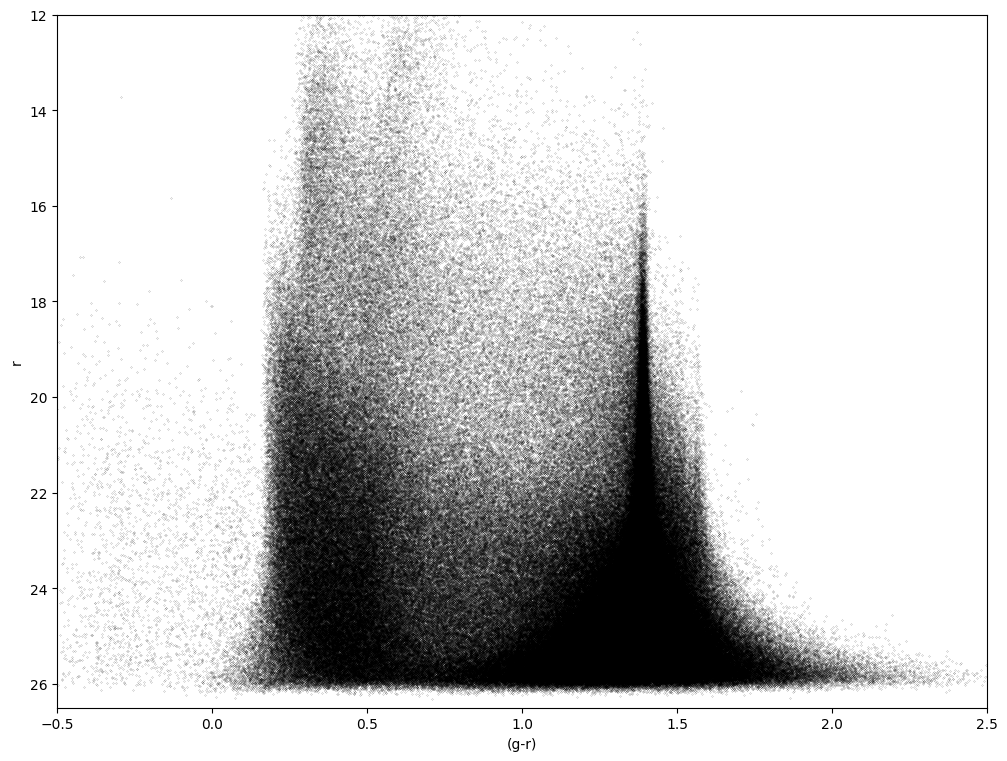

In [37]:
## last test before making output file...
fig,ax = plt.subplots(1,1,figsize=(12,9))

ax.set_xlim(-0.5,2.5)
ax.set_ylim(26.5,12)

ax.set_xlabel('(g-r)')
ax.set_ylabel('r')

ax.scatter(tGood4sims['grObs0'], tGood4sims['rmagObs'], s=0.01, c='black')  

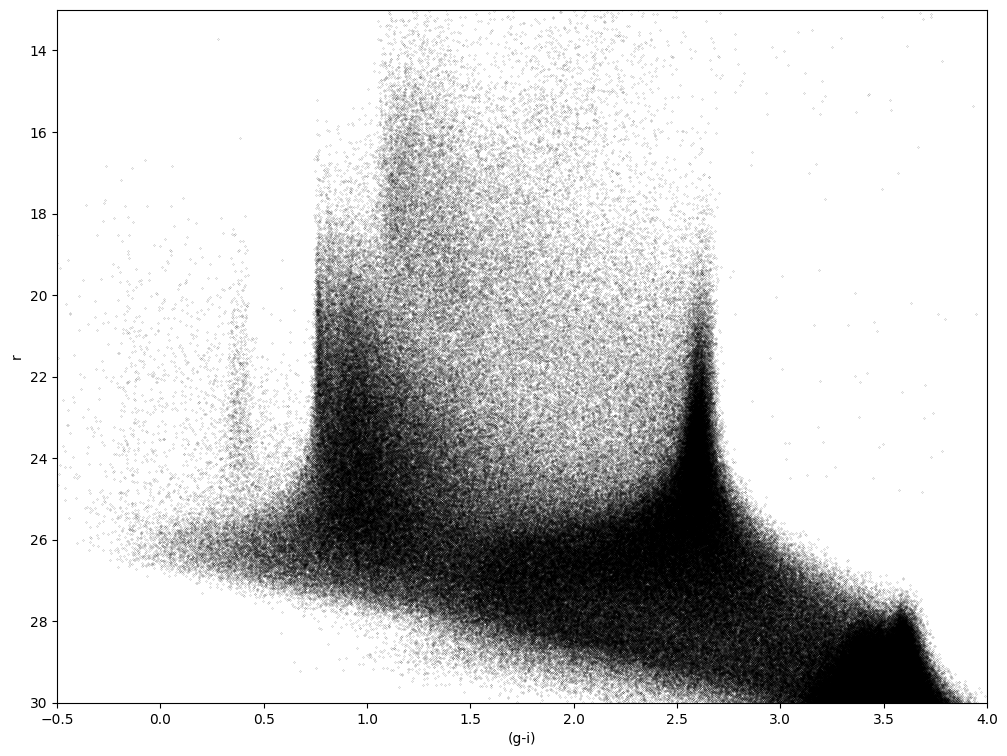

In [38]:
## last test before making output file...
fig,ax = plt.subplots(1,1,figsize=(12,9))

ax.set_xlim(-0.5,4.0)
ax.set_ylim(30,13) 

ax.set_xlabel('(g-i)')
ax.set_ylabel('r')

ax.scatter(tGood4sims['ugObs0'], tGood4sims['umagObs'], s=0.01, c='black')  

In [39]:
tGood4simsBu = tGood4sims[tGood4sims['umagObs']<25]
print(len(tGood4sims), len(tGood4simsBu))

619576 139355


In [ ]:
## last test before making output file...
fig,ax = plt.subplots(1,1,figsize=(12,9))

ax.set_xlim(-2.0,5)
ax.set_ylim(18,-4) 

ax.set_xlabel('(g-i)')
ax.set_ylabel('Mr')

ax.scatter(tGood4sims['giObs0'], tGood4sims['Mr'], s=0.01, c='black')  
#ax.scatter(tGood4simsBu['giObs0'], tGood4simsBu['Mr'], s=0.01, c='blue')  


ax.plot([0.5, 2.0], [0.3,0.3], c='red')
ax.plot([0.5, 2.0], [0.5,0.5], c='red')

 

ax.plot([-0.5, 2.0], [3.0, 3.0], c='black')
ax.plot([-0.5, 2.0], [2.5,2.5], c='black')
ax.plot([-0.5, 2.0], [3.5,3.5], c='black')

ax.plot([-0.5, 2.0], [6,6], c='cyan')

ax.plot([0.30, 0.30], [3.06, 4.15], c='cyan')
# ax.plot([0.30, 0.30], [3.06, 4.15], c='yellow')

ax.set_xlim(0,1.5)
ax.set_ylim(7.5, 1.5) 


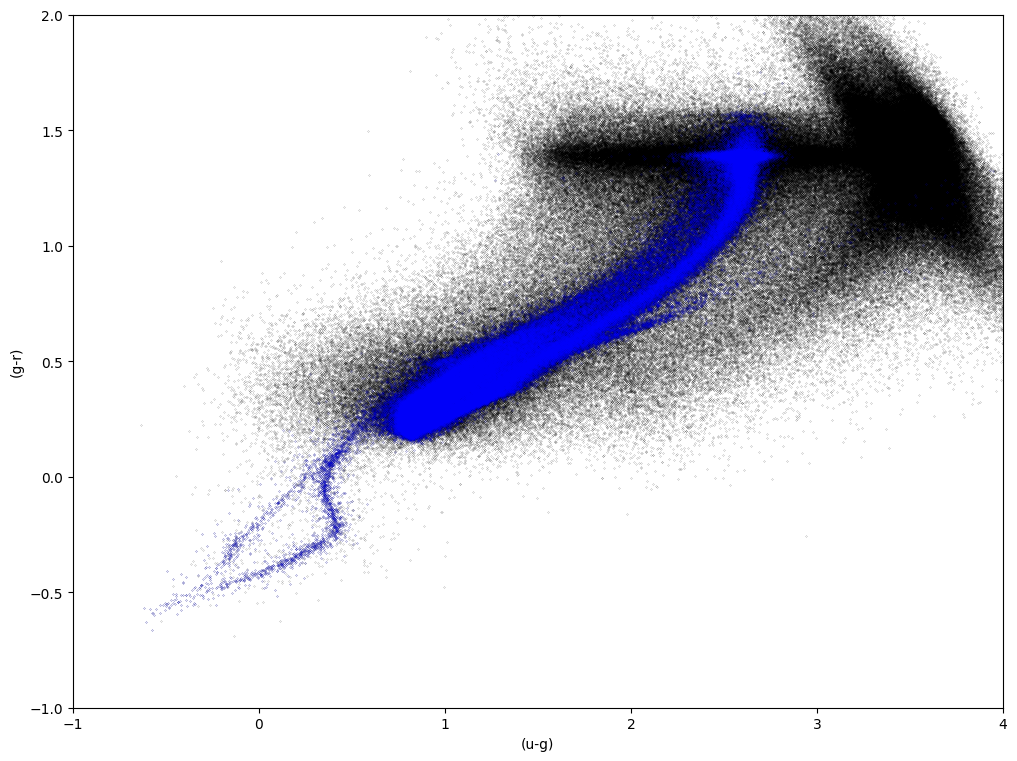

In [41]:
## last test before making output file...
fig,ax = plt.subplots(1,1,figsize=(12,9))
 
ax.set_xlim(-1.0,4.0)
ax.set_ylim(-1,2.0) 

ax.set_xlabel('(u-g)')
ax.set_ylabel('(g-r)')

ax.scatter(tGood4sims['ugObs0'], tGood4sims['grObs0'], s=0.01, c='black')  

ax.scatter(tGood4simsBu['ugObs0'], tGood4simsBu['grObs0'], s=0.01, c='blue')  

In [42]:
## 6) store in a data file  
outfile = '../data/AstroLabPriors/Stripe82/SDSSpatchRA340-350-simLSSTcatalog.txt'
fout = open(outfile, "w")
fout.write("      glon       glat      comp   logg    FeH      Mr      DM      Ar ")
fout.write(" rmagObs0   ug0     gr0     ri0     iz0    rmag   ugObs   grObs   riObs   izObs")
fout.write("   uErr   gErr   rErr   iErr   zErr    ugSL    grSL    riSL    izSL")
fout.write(" ugErrSL grErrSL riErrSL izErrSL \n")
for i in range(0,np.size(tGood4sims)):
    # input values from TRILEGAL
    r1 = tGood4sims['glon'][i]
    r2 = tGood4sims['glat'][i]
    r3 = tGood4sims['GC'][i]
    r4 = tGood4sims['logg'][i]
    r5 = tGood4sims['FeH'][i]
    r6 = tGood4sims['Mr'][i]
    r7 = tGood4sims['DM'][i]
    r8 = tGood4sims['Ar'][i]  
    s = str("%12.8f " % r1) + str("%12.8f  " % r2) + str("%3.0f  " % r3) + str("%6.2f  " % r4)
    s = s + str("%5.2f  " % r5) + str("%6.2f  " % r6) + str("%6.2f  " % r7) + str("%6.3f  " % r8)  
    # observed colors, corrected for ISM extinction, same errors as for ugObs... below
    r1 = tGood4sims['rmagTL'][i]
    r2 = tGood4sims['ugObs0'][i] 
    r3 = tGood4sims['grObs0'][i] 
    r4 = tGood4sims['riObs0'][i] 
    r5 = tGood4sims['izObs0'][i] 
    s = s + str("%6.2f" % r1) + str("%8.3f" % r2) + str("%8.3f" % r3) + str("%8.3f" % r4) + str("%8.3f" % r5)
    # observed colors, with ISM extinction included
    r1 = tGood4sims['rmagObs'][i]
    r2 = tGood4sims['ugObs'][i] 
    r3 = tGood4sims['grObs'][i] 
    r4 = tGood4sims['riObs'][i] 
    r5 = tGood4sims['izObs'][i] 
    s = s + str("%8.2f" % r1) + str("%8.3f" % r2) + str("%8.3f" % r3) + str("%8.3f" % r4) + str("%8.3f" % r5)
    # errors for observed mags, generated from observed mags
    r1 = tGood4sims['umagErrObs'][i]
    r2 = tGood4sims['gmagErrObs'][i]
    r3 = tGood4sims['rmagErrObs'][i]
    r4 = tGood4sims['imagErrObs'][i]
    r5 = tGood4sims['zmagErrObs'][i]
    s = s + str("%7.3f" % r1) + str("%7.3f" % r2) + str("%7.3f" % r3) + str("%7.3f" % r4) + str("%7.3f" % r5)
    # true input values (ISM extinction included)
    r2 = tGood4sims['ugSL'][i] 
    r3 = tGood4sims['grSL'][i] 
    r4 = tGood4sims['riSL'][i] 
    r5 = tGood4sims['izSL'][i] 
    s = s + str("%8.3f" % r2) + str("%8.3f" % r3) + str("%8.3f" % r4) + str("%8.3f" % r5)
    # true errors based on input mag values above
    r2 = tGood4sims['ugErrSL'][i] 
    r3 = tGood4sims['grErrSL'][i] 
    r4 = tGood4sims['riErrSL'][i] 
    r5 = tGood4sims['izErrSL'][i] 
    s = s + str("%8.3f" % r2) + str("%8.3f" % r3) + str("%8.3f" % r4) + str("%8.3f" % r5)
    s = s + "\n"
    fout.write(s)             
fout.close() 

In [43]:
np.max(tGoodMSRG['Mr'])

15.99

In [44]:
L10

tLoc,Mr,FeH,ug,gr,ri,iz,gi
float64,float64,float64,float64,float64,float64,float64,float64
1.4,-2.98,-2.5,1.91,0.988,0.413,0.23,1.401
1.41,-2.98,-2.5,1.91,0.988,0.413,0.23,1.401
1.42,-2.98,-2.5,1.91,0.988,0.413,0.23,1.401
1.43,-2.98,-2.5,1.91,0.988,0.413,0.23,1.401
1.44,-2.98,-2.5,1.91,0.988,0.413,0.23,1.401
1.45,-2.98,-2.5,1.91,0.988,0.413,0.23,1.401
1.46,-2.98,-2.5,1.91,0.988,0.413,0.23,1.401
...,...,...,...,...,...,...,...
15.94,15.94,0.5,2.706,1.733,2.226,1.432,3.959
